In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import os
import sklearn

In [26]:
os.chdir("/home/renaud/Dropbox/Arthur/IONIS/cours_machine_learning/Cours 2 - regression/")
df = pd.read_csv("titanic_train_clean.csv", index_col=None)      # Read the data+
# Data source : https://www.kaggle.com/c/titanic/data

In [27]:
print("Columns", df.columns)
df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.head()


Columns Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",male,35.0,8.0500,n,S,0


In [28]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd13beef60>]],
      dtype=object)

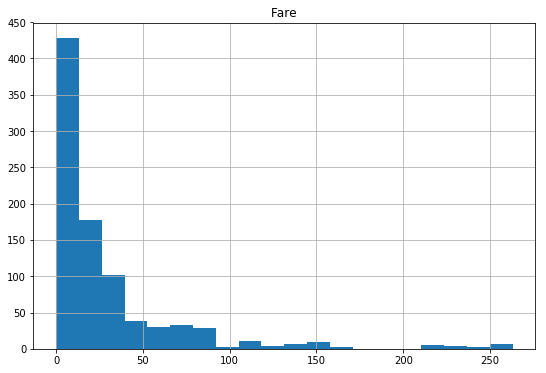

In [31]:
df[df.Fare<400].hist(column='Fare',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

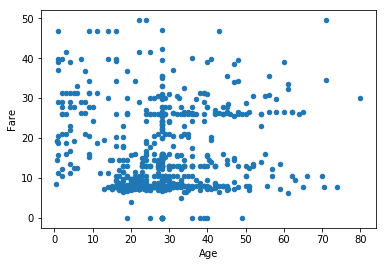

In [44]:
df[df.Fare<50].plot.scatter("Age","Fare")

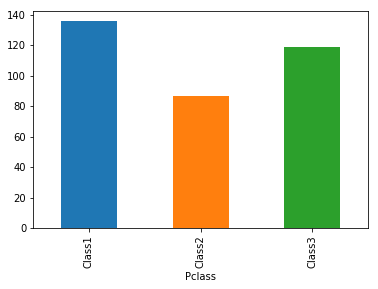

In [47]:
grouped = df.groupby(['Pclass'])['Survived']
grouped.sum().plot(kind='bar')

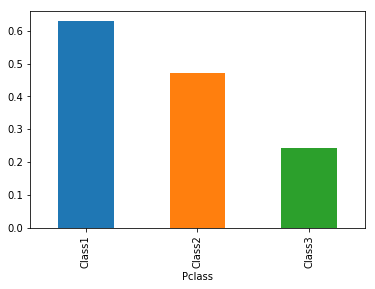

In [48]:
grouped = df.groupby(['Pclass'])['Survived']
grouped.mean().plot(kind='bar')